# Resources Availability Knowledge 


In [1]:
#Dependencies and Set up 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#File to Load 
mentalhealth_data_to_load= "Resources/survey.csv"

#Read in Survey Data 
mentalhealth_data= pd.read_csv(mentalhealth_data_to_load)

mentalhealth_data_df= pd.DataFrame(mentalhealth_data)

mentalhealth_data_df.head()




,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [2]:
#Find tech only workers 
techcompany= mentalhealth_data_df['tech_company'].value_counts()

techcompany




Yes    1031
No      228
Name: tech_company, dtype: int64

In [3]:
tech_df = mentalhealth_data_df.loc[(mentalhealth_data_df['tech_company'] =='Yes')]

tech_df


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,8/27/2014 11:31,33,Male,United States,TN,NaN,Yes,No,Sometimes,25-Jun,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,8/20/2015 16:52,29,male,United States,NC,No,Yes,Yes,Sometimes,100-500,...,Don't know,Yes,No,Some of them,No,No,Maybe,No,No,NaN
1254,9/12/2015 11:17,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,9/26/2015 1:07,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,11/7/2015 12:36,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN


In [4]:
#Create a DataFrame with gender,benefits, wellnessprogram and ability seek out help knowledge 

worker_output= pd.DataFrame(tech_df, columns=["Age","Gender", "benefits",
                                                            "wellness_program", "seek_help"])


worker_output


,Age,Gender,benefits,wellness_program,seek_help
0,37,Female,Yes,No,Yes
2,32,Male,No,No,No
3,31,Male,No,No,No
4,31,Male,Yes,Don't know,Don't know
5,33,Male,Yes,No,Don't know
...,...,...,...,...,...
1252,29,male,Yes,Yes,No
1254,26,male,No,No,No
1255,32,Male,Yes,No,No
1256,34,male,Yes,No,No


In [5]:
care_df= pd.DataFrame(tech_df,columns=['care_options'])

care_df

,care_options
0,Not sure
2,No
3,Yes
4,No
5,Not sure
...,...
1252,Yes
1254,No
1255,Yes
1256,Yes


<AxesSubplot:>

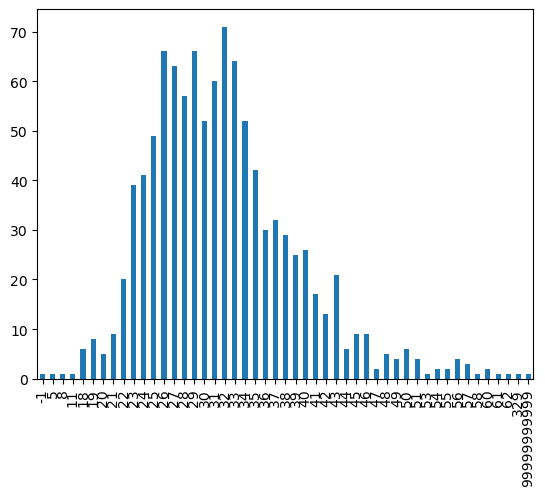

In [7]:
worker_output["Age"].value_counts().sort_index().plot(kind="bar")

(1025, 5)


<AxesSubplot:>

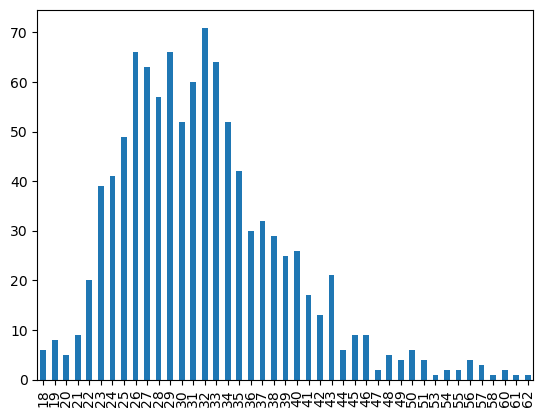

In [8]:
worker_output=worker_output[(worker_output["Age"]>= 18) & (worker_output["Age"]<= 72)].copy()
print(worker_output.shape)
worker_output["Age"].value_counts().sort_index().plot(kind="bar")

In [13]:
#pie chart for overall knowledge of care options 

care_pie= care_df['care_options'].value_counts

care_pie






<bound method IndexOpsMixin.value_counts of 0       Not sure
2             No
3            Yes
4             No
5       Not sure
          ...   
1252         Yes
1254          No
1255         Yes
1256         Yes
1257         Yes
Name: care_options, Length: 1031, dtype: object>

Text(0.5, 1.0, 'Knowledge of Care Option Availability')

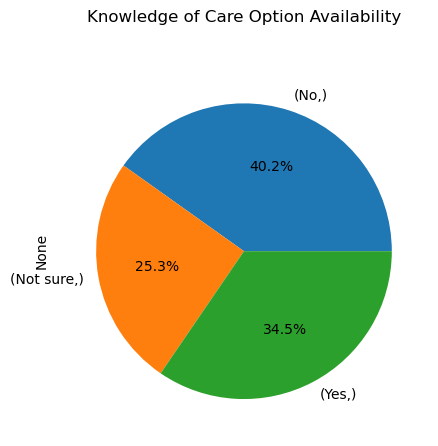

In [19]:
care_df.value_counts().sort_index().plot(kind="pie",autopct='%1.1f%%')
plt.title('Knowledge of Care Option Availability', pad=32)

In [ ]:
#Bins for Bar Charts for benefits, wellness program, seek help 
bins = [0, 25, 30, 40, 72]
labels = ["Entry Level","Early/Mid Career","Mid Career", "Late Career"]
worker_output['Age Category'] = pd.cut(worker_output['Age'], bins=bins, labels=labels)
worker_output['Age Category'].value_counts()


Mid Career          431
Early/Mid Career    304
Entry Level         177
Late Career         113
Name: Age Category, dtype: int64

In [ ]:
#Early career
worker_output_ec= worker_output[worker_output["Age Category"]=="Entry Level"].copy ()


In [ ]:
#Early Career 
ec_b = worker_output_ec['benefits'].value_counts()
ec_wellness = worker_output_ec['wellness_program'].value_counts()
ec_help = worker_output_ec['seek_help'].value_counts()

In [ ]:
#Early Career Data Frame 
ec_df= pd.DataFrame({"Benefits": ec_b,
"Wellness Programs": ec_wellness, 
"Seek Help": ec_help})

ec_df

,Benefits,Wellness Programs,Seek Help
Don't know,79,39,61
No,46,112,95
Yes,52,26,21


Text(0.5, 1.0, 'Early Career Worker Knowledge of Mental Health Ressources Provided By Employer')

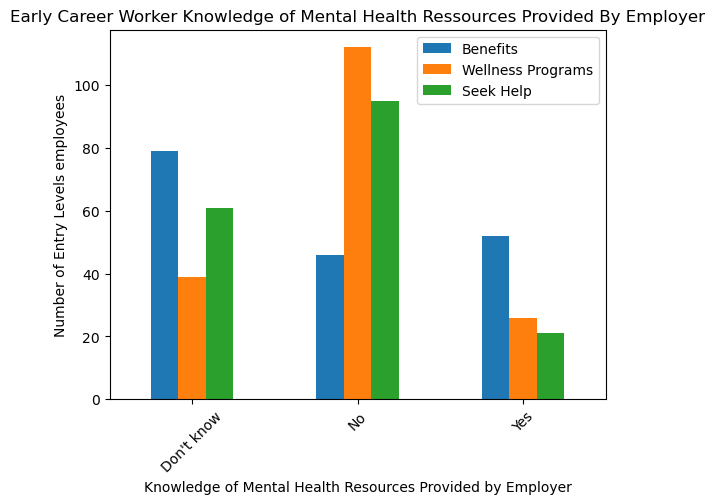

In [ ]:
#Early Career Bargraph 
ec_df.plot(kind='bar')
plt.xticks(rotation=45)



plt.xlabel('Knowledge of Mental Health Resources Provided by Employer')
plt.ylabel('Number of Entry Levels employees')
plt.title('Early Career Worker Knowledge of Mental Health Ressources Provided By Employer')


In [ ]:
#Need early mid  data frame by age category 
worker_output_emid= worker_output[worker_output["Age Category"]=="Early/Mid Career"].copy ()

worker_output_emid

,Age,Gender,benefits,wellness_program,seek_help,Age Category
11,29,male,Don't know,No,No,Early/Mid Career
14,27,Male,Don't know,Don't know,Don't know,Early/Mid Career
15,29,female,Yes,No,No,Early/Mid Career
20,29,Male,Yes,No,No,Early/Mid Career
32,30,male,Don't know,No,No,Early/Mid Career
...,...,...,...,...,...,...
1242,28,Male,Don't know,No,Don't know,Early/Mid Career
1249,30,M,Yes,Don't know,No,Early/Mid Career
1250,30,Male,Yes,Yes,Yes,Early/Mid Career
1252,29,male,Yes,Yes,No,Early/Mid Career


In [ ]:
#need early mid survey results 
emid_b = worker_output_emid['benefits'].value_counts()
emid_wellness = worker_output_emid['wellness_program'].value_counts()
emid_help = worker_output_emid['seek_help'].value_counts()

In [ ]:
#Early/Mid data frame with survey results 

emid_df= pd.DataFrame({"Benefits": emid_b,
"Wellness Programs": emid_wellness, 
"Seek Help": emid_help})

emid_df

,Benefits,Wellness Programs,Seek Help
No,107,223,178
Don't know,100,45,85
Yes,97,36,41


Text(0.5, 1.0, 'Mid/Early Career Worker Knowledge of Mental Health Ressources Provided By Employer')

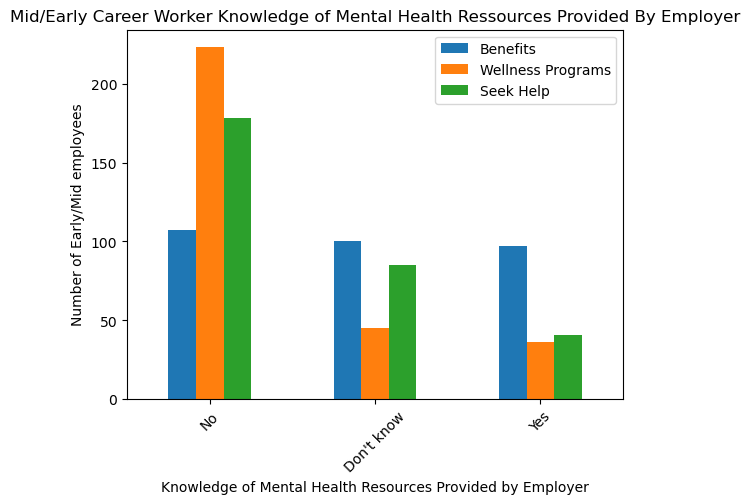

In [ ]:
#Early/Mid Available resources data bargraph 
emid_df.plot(kind='bar')
plt.xticks(rotation=45)



plt.xlabel('Knowledge of Mental Health Resources Provided by Employer')
plt.ylabel('Number of Early/Mid employees')
plt.title('Mid/Early Career Worker Knowledge of Mental Health Ressources Provided By Employer')

In [ ]:
# Mid Career  create data frame 
worker_output_mid= worker_output[worker_output["Age Category"]=="Mid Career"].copy ()

worker_output_mid

,Age,Gender,benefits,wellness_program,seek_help,Age Category
0,37,Female,Yes,No,Yes,Mid Career
2,32,Male,No,No,No,Mid Career
3,31,Male,No,No,No,Mid Career
4,31,Male,Yes,Don't know,Don't know,Mid Career
5,33,Male,Yes,No,Don't know,Mid Career
...,...,...,...,...,...,...
1241,31,Male,No,No,No,Mid Career
1246,32,Male,Yes,Don't know,Yes,Mid Career
1247,36,male,No,No,No,Mid Career
1255,32,Male,Yes,No,No,Mid Career


In [ ]:
#value counts for responses on survey

mid_b = worker_output_mid['benefits'].value_counts()
mid_wellness = worker_output_mid['wellness_program'].value_counts()
mid_help = worker_output_mid['seek_help'].value_counts()

In [ ]:
#mid career data frame 

mid_df= pd.DataFrame({"Benefits": mid_b,
"Welness Programs": mid_wellness, 
"Seek Help": mid_help})

mid_df

,Benefits,Welness Programs,Seek Help
Don't know,123,63,118
No,145,298,235
Yes,163,70,78


Text(0.5, 1.0, 'Mid Career Worker Knowledge of Mental Health Ressources Provided By Employer')

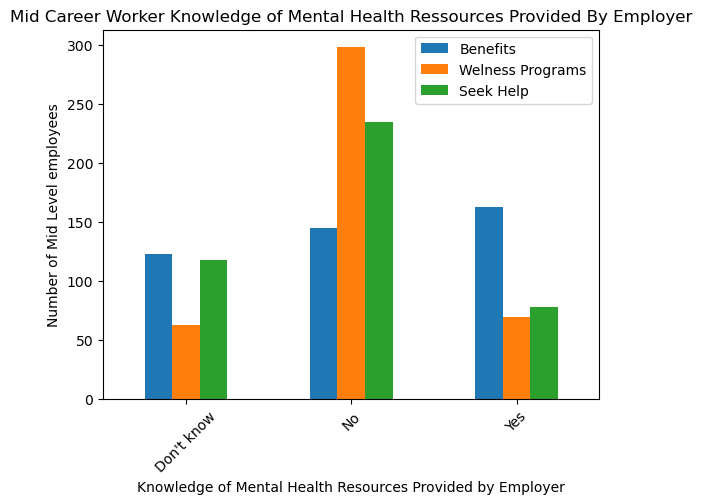

In [ ]:
#barchart for mid 
mid_df.plot(kind='bar')
plt.xticks(rotation=45)



plt.xlabel('Knowledge of Mental Health Resources Provided by Employer')
plt.ylabel('Number of Mid Level employees')
plt.title('Mid Career Worker Knowledge of Mental Health Ressources Provided By Employer')


In [ ]:
#late career by age and knowledge of resources 
worker_output_late= worker_output[worker_output["Age Category"]=="Late Career"].copy ()

worker_output_late

,Age,Gender,benefits,wellness_program,seek_help,Age Category
8,42,Female,Yes,No,No,Late Career
18,46,male,Yes,Yes,Don't know,Late Career
22,46,Male,Yes,No,No,Late Career
33,42,Male,Yes,Yes,Yes,Late Career
38,50,M,Yes,No,Don't know,Late Career
...,...,...,...,...,...,...
1222,41,female,Don't know,Don't know,Yes,Late Career
1236,60,Male,Don't know,Yes,Don't know,Late Career
1243,43,f,Yes,No,Yes,Late Career
1248,41,Female,Yes,No,Don't know,Late Career


In [ ]:
#value counts for responses on survey for late career 

late_b = worker_output_late['benefits'].value_counts()
late_wellness = worker_output_late['wellness_program'].value_counts()
late_help = worker_output_late['seek_help'].value_counts()

In [ ]:
#Late career data frame 
late_df= pd.DataFrame({"Benefits": late_b,
"Welness Programs": late_wellness, 
"Seek Help": late_help})

late_df

,Benefits,Welness Programs,Seek Help
Don't know,32,14,32
No,23,71,42
Yes,58,28,39


Text(0.5, 1.0, 'Late Career Worker Knowledge of Mental Health Ressources Provided By Employer')

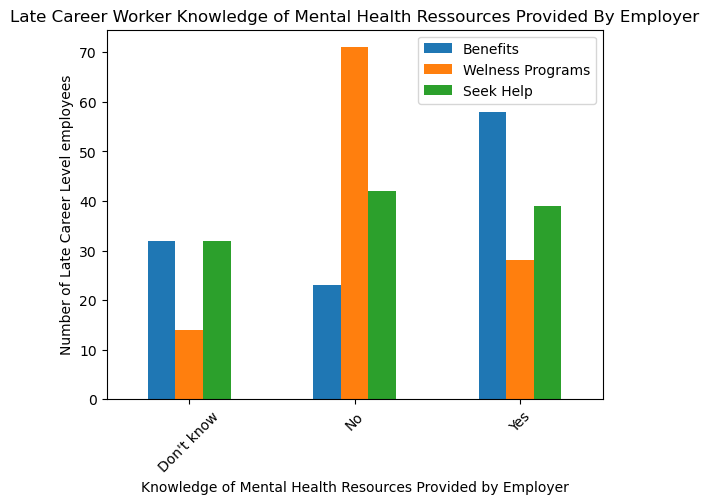

In [ ]:
#barchart for late
late_df.plot(kind='bar')
plt.xticks(rotation=45)



plt.xlabel('Knowledge of Mental Health Resources Provided by Employer')
plt.ylabel('Number of Late Career Level employees')
plt.title('Late Career Worker Knowledge of Mental Health Ressources Provided By Employer')